In [1]:
from epyt import epanet

In [2]:
d = epanet('BUILDING.inp', "CREATE")

EPANET version 20200 loaded (EPyT version 1.0.1).
Input File BUILDING.inp loaded successfully.



In [3]:
TYPICAL_BUILDING_HEIGHT_M = 34.75138
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE = 74.60529333333334
TYPICAL_BUILDING_PIPE_DIAMETER_MM = 304.8 # TODO: Verify that this is reasonable
TYPICAL_BUILDING_PIPE_ROUGHNESS = 100 # TODO: Verify that this is reasonable
MEAN_WATER_TANK_DIAMETER_M = 3.6576
MEAN_WATER_TANK_HEIGHT_M = 3.6576

In [4]:
# Initialize epanet flow units. We are using SI Units. 
# See here for more details: https://epanet22.readthedocs.io/en/latest/back_matter.html
d.initializeEPANET(d.ToolkitConstants.EN_LPM, d.ToolkitConstants.EN_HW)

  Page 1                                    Sat Nov 19 18:25:02 2022

  ******************************************************************
  *                           E P A N E T                          *
  *                   Hydraulic and Water Quality                  *
  *                   Analysis for Pipe Networks                   *
  *                         Version 2.2                            *
  ******************************************************************
  

In [5]:


# an elevation of 700 ft and a demand of 0
index = d.addNodeJunction('J1')
# TODO: Modulate this this using our demand curve
d.setNodeJunctionData(index, 0, TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE, '')
d.setNodeCoordinates(index, [50, -100])

# TODO: Maybe we want to add a junction and a outflow per floor? Probably not relevant.

# Add the reservoir at an elevation of 0 ft
index = d.addNodeReservoir('R1')
d.setNodeElevations(index, 0)
d.setNodeCoordinates(index, [-50, -100])

# Add the tank node at elevation of TYPICAL_BUILDING_HEIGHT_M meters, initial water level
# at 1.0 meters, minimum level at 0 meters, maximum level at MEAN_WATER_TANK_HEIGHT_M meters
# and a diameter of MEAN_WATER_TANK_DIAMETER_M meters
index = d.addNodeTank('T1')  #bug check
d.setNodeTankData(index, TYPICAL_BUILDING_HEIGHT_M, 1.0, 0.0, MEAN_WATER_TANK_HEIGHT_M, MEAN_WATER_TANK_DIAMETER_M, 0, '')
d.setNodeCoordinates(index, [0, 50])

# Add the pipes to the project, setting their length,   
# diameter, and roughness values
index = d.addLinkPipe('P1', 'R1', 'T1')
d.setLinkPipeData(index, TYPICAL_BUILDING_HEIGHT_M, TYPICAL_BUILDING_PIPE_DIAMETER_MM, TYPICAL_BUILDING_PIPE_ROUGHNESS, 0)
index = d.addLinkPipe('P2', 'T1', 'J1')
d.setLinkPipeData(index, TYPICAL_BUILDING_HEIGHT_M, TYPICAL_BUILDING_PIPE_DIAMETER_MM, TYPICAL_BUILDING_PIPE_ROUGHNESS, 0)
 
# Add a pump to the project
index = d.addLinkPump('PUMP', 'R1', 'T1')
 
# Create a single point head curve (index = 1) and
# assign it to the pump
d.addCurve('C1')
d.setCurveValue(1, 1, [1500, 250])
d.setLinkPumpHCurve(index, 1)
 
# Save the project for future use
d.saveInputFile("../networks/BUILDING.inp")

/opt/homebrew/Caskroom/mambaforge/base/envs/engineering-smart-cities/lib/python3.11/site-packages/epyt/epanet.py:11948: UserWarning: Error 203: function call contains undefined node
  warnings.warn(errmssg.value.decode())
/opt/homebrew/Caskroom/mambaforge/base/envs/engineering-smart-cities/lib/python3.11/site-packages/epyt/epanet.py:11948: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())


In [6]:
d.getNodeCount()

3

In [7]:
d.getNodeElevations()

array([ 0.        ,  0.        , 10.59222062])

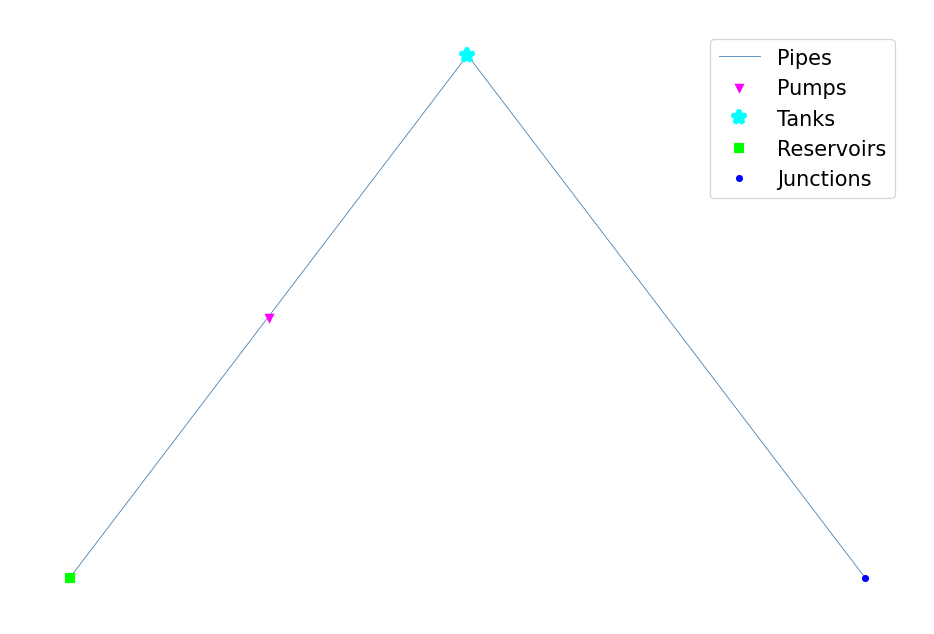

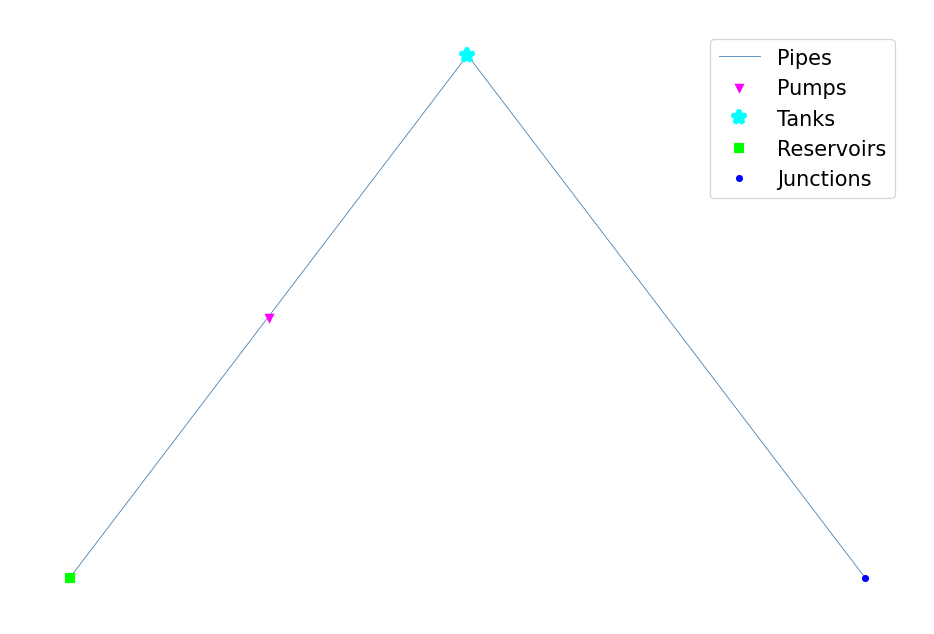

In [8]:
d.plot()